# MEMORY MODEL FOR HLS WITH FPGAs 

#### Please, run each cell sequentially. 
#### We shows for each LSU type
#### 1) Measurements captured from profiler and Report Files and the figures generated for the paper.
#### 2) Model estimation, and dependency analisys described in the paper

## Burst Coalesced Aligned

In [287]:
import pandas as pd

mc1 = pd.read_csv("Coalesced_1866.csv",decimal=',')
# mc1["BW (MB/S)"]=pd.to_numeric(mc1["BW (MB/S)"])
mc1

,LOAD/STORE,SIMD,Frequency (MHz),BW read,BW write,Avr. Write Burst,Avr. Read Burst,Stall Read (%),Stall Write (%),Time (ms),Type of memory,LD units,Width LD,ST Units,Width Units,Latency,BW (MB/s)
0,1,2,475.0,0.0,3800.0,0,16,0.00,0.57,34.56,Coalesced,0,0,1,64,108,3800.00
1,1,4,460.0,0.0,7586.7,0,15,0.37,2.45,17.33,Coalesced,0,0,1,128,108,7586.70
2,1,8,445.0,0.0,12672.4,0,15,49.41,2.45,9.27,Coalesced,0,0,1,256,108,12672.40
3,1,16,468.8,0.0,12556.0,0,15,52.54,2.45,9.30,Coalesced,0,0,1,512,108,12556.00
4,2,2,475.0,4274.0,3799.0,15,6,1.00,2.45,34.56,Coalesced,1,64,1,64,645,7585.19
5,2,4,470.0,5972.0,5811.0,15,13,1.21,2.45,21.71,Coalesced,1,128,1,128,645,12074.80
6,2,8,460.0,6807.0,6807.0,15,17,2.00,2.45,19.52,Coalesced,1,256,1,256,645,13429.51
7,2,16,466.7,7007.0,7007.0,15,18,1.47,2.96,18.37,Coalesced,1,512,1,512,645,14270.22
8,3,2,462.5,3075.7,2798.1,12,6,3.18,1.60,48.02,Coalesced,2,64,1,64,650,8722.00
9,3,4,441.7,3779.3,3779.3,15,12,2.23,1.73,35.84,Coalesced,2,128,1,128,650,10942.20


In [178]:
#Import and set the label in figures
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
colorcycle = ['#525564','#96c0ce','#df9850','#c25B56','#beb9b5','#dfBA87']
marker_data=['v','X','o','D','s']
fs=12

BW_1866=14928 #bytes/s
group = ("#lsu=1", "#lsu=2", "#lsu=3", "#lsu=4", "#lsu=5")

width = ("64", "128", "256", "512")
fs=12
r=1
c=1

## Model Burst Coalesced Aligned GMI

### We model the memory based on description of the hld/ips of altera. 

/Users/angelica/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


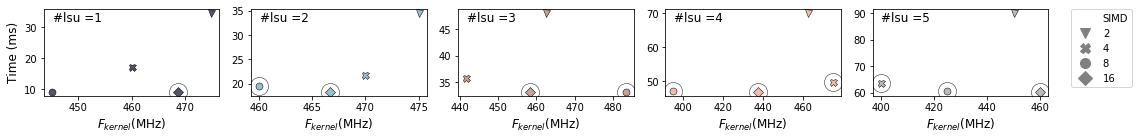

In [300]:
#Frequency Dependency graph
from matplotlib.ticker import FormatStrFormatter
r=1
c=5
fig1, ax1 = plt.subplots(r,c, figsize=(18,1.6))
plt.subplots_adjust(hspace=0.45,wspace=0.15)
# i=0
group = ['#lsu =1', "#lsu =2", "#lsu =3", "#lsu =4", "#lsu =5"]
groupW = ["SIMD","2", "4", "8", "16"]
min_frq=np.min(mc1.get("Frequency (MHz)"))

plt.subplot(r,c,1)
plt.subplots_adjust(hspace=0.45,wspace=0.18)
for i in range (0,5):   
    plt.subplot(r,c,i+1)
    for j in range (0,4):
    
        if (bin[i*4+j]==1):
            plt.plot (mc1.loc[[i*4+j], "Frequency (MHz)"],
             np.multiply(mc1.loc[[i*4+j], "Time (ms)"] , 1),
              color='white',
              marker=marker_data[2],
              linestyle="",
              markeredgewidth=0.5,
              markeredgecolor ='black',
              markersize=18,
              alpha=0.9        
                 )
        
        plt.plot (mc1.loc[[i*4+j], "Frequency (MHz)"],
             np.multiply(mc1.loc[[i*4+j], "Time (ms)"] , 1),
              color=colorcycle[i],
              marker=marker_data[j],
              linestyle="",
              markeredgewidth=0.5,
              markeredgecolor ='black',
              markersize=7
                 )

    plt.title(group[i],x=0.05,y=0.79,loc='left')
    plt.xlabel(r'$F_{kernel}$(MHz)',fontsize=fs)
    from matplotlib.ticker import StrMethodFormatter
    plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
    if (i==0 or i==c):
       plt.ylabel("Time (ms)",fontsize=fs)
#
#plt.subplot(r,c,3)

custom_lines=                 [
              Line2D([0],[0],linestyle=""),
              Line2D([0],[0],linestyle="",marker=marker_data[0], color='grey',lw=1,markersize=10),
              Line2D([0],[0],linestyle="",marker=marker_data[1],color='grey',lw=2,markersize=10),
              Line2D([0],[0],linestyle="",marker=marker_data[2],color='grey',lw=2,markersize=10),
              Line2D([0],[0],linestyle="",marker=marker_data[3],color='grey',lw=1,markersize=10),
             ]
#ax1
cont=np.concatenate([groupW])
#plt.legend(handles = [circ3,circ2,circ1,circ4],loc=2,bbox_to_anchor=(1.1, 1.05))
plt.legend(custom_lines,cont,loc=2,bbox_to_anchor=(1.1, 1.05))
#plt.legend(custom_lines,cont,ncol=4,fontsize=fs,loc='upper center',bbox_to_anchor=(2, 1.05))

plt.savefig('Frq_dep.pdf',bbox_inches="tight")

factor_c=mc1.loc[:, "Time (ms)"]/mc1.loc[:, "Frequency (MHz)"]

In [288]:
group = ("Measured LD/ST=1", "Measured LD/ST=2", "Measured LD/ST=2", "Measured LD/ST=3", "Measured LD/ST=4")
group2 = ("Estimated LD/ST=1", "Estimated LD/ST=2", "Estimated LD/ST=2", "Estimated LD/ST=3", "Estimated LD/ST=4")
group = ("LSU=1", "LSU=2", "LSU=3", "LSU=4", "LSU=5")
group = ['#lsu =1', "#lsu =2", "#lsu =3", "#lsu =4", "#lsu =5"]
title = ("", "LD/ST=2", "LD/ST=2", "LD/ST=3", "LD/ST=4")


LSU=mc1.get("LOAD/STORE")
WD=mc1.get("Width Units")
FRQ=mc1.get("Frequency (MHz)")*1e6
TIME=mc1.get("Time (ms)")
LATENCY=mc1.get("Latency")

BW=14928e6
# Fmem=2666e6
Fmem=1866e6
dq=64
K_width=64
burst_n=5

TRCD=13.5e-9
TRP =13.5e-9

WI=32768000
ls_bytes=4

factor=1#((max_burst/((mc1.get("LOAD/STORE"))**2)))
burst_size=2**(burst_n)*dq

Cco=np.ones(len(WD))
Cycles=Cco
T_exe=np.zeros(len(WD))
T_ovh=np.zeros(len(WD))
T_ideal=LSU/BW *ls_bytes*WI 
for i in range (0,len(WD)):
     T_ovh[i]=((LSU[i])/(burst_size))*(TRCD+TRP)*ls_bytes*WI 
     if (LSU[i]<3):
        T_ovh[i]=0

     T_exe[i]=T_ideal[i]+T_ovh[i]

max_burst= WD/8 *LSU /64
#filter to graph only the memory bound part  
bin=(max_burst>=1)    
bin= np.multiply(bin,1)

Est_time = (T_exe)*1000 *bin
T_ideal=T_ideal*1000 *bin
T_ovh=T_ovh*1000 *bin
error= (np.abs(Est_time-TIME)/TIME)*100

print ("Estimated Error in Burst Coalesced Aligned \n",error)


Estimated Error in Burst Coalesced Aligned 
 0     100.000000
1     100.000000
2     100.000000
3       5.588401
4     100.000000
5     100.000000
6      10.038128
7       4.406329
8     100.000000
9     100.000000
10      5.216969
11      5.245458
12    100.000000
13     15.307043
14     10.909041
15     10.377154
16    100.000000
17     17.335756
18     13.154722
19     12.953291
dtype: float64


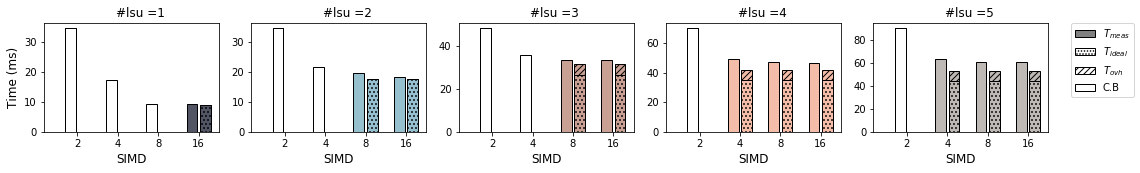

In [289]:
#Figures to paper showing the measured and estimated time
import matplotlib.patches as mpatches
r=1
c=5
width = ("2", "4", "8", "16")
colorcycle = ['#525564','#96c0ce','#c9a194','#f3bdaa','#beb9b5','#dfBA87']
fig1, ax1 = plt.subplots(r,c, figsize=(18,2))
# i=0
plt.subplots_adjust(hspace=0.45,wspace=0.185)

for i in range (0,5):   
    plt.subplot(r,c,i+1)
    y_pos=range(2,16*2,3)
    for j in range (0,4): 
        if (j==0):
            plt.bar (y_pos[j],
             np.divide(mc1.loc[[i*4+j], "Time (ms)"] , 1),
             alpha=1, color=colorcycle[i],linewidth=1
                     ,edgecolor='black'
                     #,hatch = '|||'
            )
            plt.title(group[i],x=0.55,y=1,loc='center')
        if (bin[i*4+j]==1):
            plt.bar (y_pos[j],
             np.divide(mc1.loc[[i*4+j], "Time (ms)"] , 1),
             alpha=1, color=colorcycle[i],linewidth=1
                     ,edgecolor='black'
                     #,hatch = '|||'
                    )
        else:
            plt.bar (y_pos[j],
             np.divide(mc1.loc[[i*4+j], "Time (ms)"] , 1),
             alpha=1, color='white',linewidth=1,edgecolor='black')
        
    y_pos=np.add(y_pos,1)
    bot_Tideal=[T_ideal[i*4],T_ideal[i*4+1],T_ideal[i*4+2],T_ideal[i*4+3]]
    top_Tovh=[T_ovh[i*4],T_ovh[i*4+1],T_ovh[i*4+2],T_ovh[i*4+3]]
    plt.bar ([y_pos[0],y_pos[1],y_pos[2],y_pos[3]],
             bot_Tideal,
             alpha=1, color=colorcycle[i],  hatch = '...',edgecolor='black'
            )
    plt.bar ([y_pos[0],y_pos[1],y_pos[2],y_pos[3]],
             top_Tovh,
             bottom=bot_Tideal,
             alpha=1, color=colorcycle[i],  hatch = '////',edgecolor='black'
            )
    plt.xlabel("SIMD",fontsize=fs)
    if (i==0):
        plt.ylabel("Time (ms)",fontsize=fs)

    y_pos=range(2,16*2,3)
    y_pos=np.add(y_pos,0.5)
    plt.xticks(y_pos, width)   

    plt.xlim([0,13])
a_val=1
circ1 = mpatches.Patch( facecolor='w',alpha=a_val,hatch=r'////',label=r'$T_{ovh}$',edgecolor='black')
circ2= mpatches.Patch( facecolor='w',alpha=a_val,hatch='....',label=r'$T_{ideal}$',edgecolor='black')
circ3 = mpatches.Patch(facecolor='grey',label=r'$T_{meas}$',edgecolor='black')
#circ3 = mpatches.Patch(facecolor='w',color='grey',alpha=a_val,hatch='|||',label=r'$T_{meas}$',edgecolor='black')
circ4 = mpatches.Patch(facecolor='w',alpha=a_val,hatch='',label=r'C.B',edgecolor='black')
plt.legend(handles = [circ3,circ2,circ1,circ4],loc=2,bbox_to_anchor=(1.1, 1.05))


plt.savefig('Mem_model_coalesced_1866_bar_ovh2.pdf', bbox_inches="tight")

error= (np.abs(Est_time-TIME)/TIME)*100

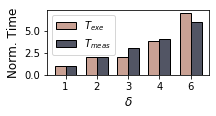

In [321]:
# testing the stride access
# for pair number the access generated are coalesced aligned
#this test is executed with #lsu=3

delta=[1, 2, 3, 4, 6]
deltaT_exe=[33.27,66.54, 67.97, 127.86,233.3]
ndeltaT_exe=np.divide(deltaT_exe,deltaT_exe[0])

x = [1,2,3,4,5]

fig1, ax1 = plt.subplots(1,1, figsize=(2.9,1.2))
width=0.35

plt.bar(np.add(x,-width/2),ndeltaT_exe, width, color=colorcycle[2],edgecolor='black' )
plt.xticks(x, delta) 
plt.bar(np.add(x,width/2),delta,width, color=colorcycle[0],edgecolor='black' )
plt.legend([r'$T_{exe}$',r'$T_{meas}$'])


plt.xlabel(r'$\delta$',fontsize=fs)
plt.ylabel("Norm. Time",fontsize=fs)

plt.savefig('Mem_model_coalesced_1866_delta.pdf', bbox_inches="tight")

## Burst Coalesced Non-Aligned

In [323]:
import pandas as pd
mn1 = pd.read_csv("NonAligned_1866.csv",decimal=',')
# mc1["BW (MB/S)"]=pd.to_numeric(mc1["BW (MB/S)"])
mn1

,LOAD/STORE,SIMD,Frequency (MHz),BW read,BW write,Avr. Write Burst,Avr. Read Burst,Stall Read (%),Stall Write (%),Time (ms),Type of memory,LD units,Width LD,ST Units,Width Units,Latency,BW (MB/S)
0,1,2,410.00,0.0,7603.0,8,0,1.97,0.95,55.04,Non-aligned,0,0,1,256,0,7599.6
1,1,4,406.20,0.0,11615.0,5,0,1.97,7.72,35.61,Non-aligned,0,0,1,512,0,11763.1
2,1,8,412.50,0.0,14237.0,11,0,1.97,46.07,18.86,Non-aligned,0,0,1,1024,0,12775.7
3,1,16,390.00,0.0,14239.0,15,0,1.97,42.95,27.71,Non-aligned,0,0,1,2048,0,12880.1
4,2,2,370.00,4726.0,4871.2,8,10,1.97,4.85,85.84,Non-aligned,1,256,1,256,0,9263.8
5,2,4,418.80,6031.3,6321.5,6,10,2.30,6.01,66.20,Non-aligned,1,512,1,512,0,11737.1
6,2,8,362.50,6750.3,6933.9,11,8,3.58,3.88,59.48,Non-aligned,1,1024,1,1024,0,13016.3
7,2,16,337.50,7635.2,6324.8,15,11,3.43,3.76,62.79,Non-aligned,1,2048,1,2048,0,13412.3
8,3,2,334.40,2955.5,2937.7,8,7,4.48,3.23,142.29,Non-aligned,2,256,1,256,240,8558.0
9,3,4,358.30,3255.5,3088.4,6,6,5.88,4.36,135.33,Non-aligned,2,512,1,512,240,9216.0


## Model Burst Coalesced Non-Aligned GMI

/Users/angelica/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/angelica/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


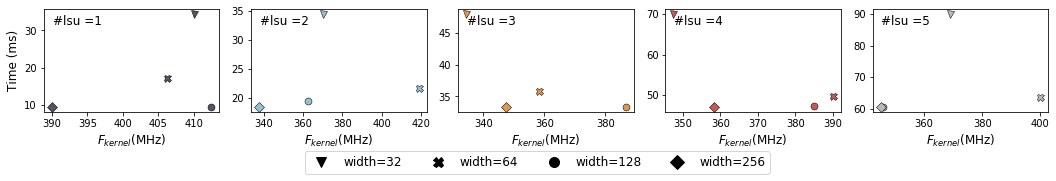

In [266]:
#Frequency Dependency
from matplotlib.ticker import FormatStrFormatter

colorcycle = ['#525564','#96c0ce','#df9850','#c25B56','#beb9b5','#dfBA87']

r=1
c=5
fig1, ax1 = plt.subplots(r,c, figsize=(18,1.9))
# i=0
group = ['#lsu =1', "#lsu =2", "#lsu =3", "#lsu =4", "#lsu =5"]
groupW = ["width=32", "width=64", "width=128", "width=256"]


min_frq=np.min(mn1.get("Frequency (MHz)"))



plt.subplot(r,c,1)
plt.subplots_adjust(hspace=0.45,wspace=0.18)
for i in range (0,5):   
    plt.subplot(r,c,i+1)
    for j in range (0,4):
        plt.plot (mn1.loc[[i*4+j], "Frequency (MHz)"],
             np.multiply(mc1.loc[[i*4+j], "Time (ms)"] , 1),
              #label=groupW[j],
              color=colorcycle[i],
              marker=marker_data[j],
              linestyle="",
              markeredgewidth=0.5,
              markeredgecolor ='black',
#                   label=group[i],
              markersize=7
                 )
    plt.title(group[i],x=0.05,y=0.79,loc='left')
    plt.xlabel(r'$F_{kernel}$(MHz)',fontsize=fs)
    from matplotlib.ticker import StrMethodFormatter
    plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
#     plt.legend()
#     plt.legend(custom_lines[0], group[0])
#         plt.xlim(right=490)
    if (i==0 or i==c):
       plt.ylabel("Time (ms)",fontsize=fs)

plt.subplot(r,c,3)

custom_lines=                 [
              Line2D([0],[0],linestyle="",marker=marker_data[0], color='black',lw=1,markersize=10),
              Line2D([0],[0],linestyle="",marker=marker_data[1],color='black',lw=2,markersize=10),
              Line2D([0],[0],linestyle="",marker=marker_data[2],color='black',lw=2,markersize=10),
              Line2D([0],[0],linestyle="",marker=marker_data[3],color='black',lw=1,markersize=10),
             ]



#ax1
cont=np.concatenate([groupW])
plt.legend(custom_lines,cont,ncol=4,fontsize=fs,loc='upper center',bbox_to_anchor=(0.45, -0.32))

# plt.subplot(r,c,6)
# fig.patch.set_visible(False)
# plt.axis('off')

plt.savefig('Frq_dep_na.pdf',bbox_inches="tight")

In [329]:
LSU=mn1.get("LOAD/STORE")
WD=mn1.get("Width Units")
FRQ=mn1.get("Frequency (MHz)")*1e6
TIME=mn1.get("Time (ms)")

ST=mn1.get("LD units")
LD=mn1.get("ST Units")

BW=14928e6
Fmem=1866e6

burst_n=5

TRCD=13.5e-9
TRP=TRCD

WI=32768000
ls_bytes=4
delta=3
dq=8
bl=8

max_th=64 #from Ip
max_burst=2**(burst_n) * dq * bl 
lim_th=max_th*(WD/8)/(delta)
max_word=np.zeros(len(WD))
for i in range (0,len(WD)):
    if(lim_th[i]<max_burst):
        max_word[i]=2048
        #lim_th[i]
    else:
        max_word[i]=WD[i]

burst_size=max_word/delta
burst_size=64*np.ceil(np.divide(burst_size,64*np.ones(len(WD))))
T_exe=np.zeros(len(WD))
T_ovh=np.zeros(len(WD))
T_ideal=LSU/BW *ls_bytes*WI 

for i in range (0,len(WD)):
     
     T_ovh[i]=((LSU[i])/(burst_size[i]))*((TRCD+TRP))*ls_bytes*WI
     
     if (LSU[i]<3):
        T_ovh[i]=0
     Tco = 0
     T_exe[i]=(T_ideal[i]+T_ovh[i]) *(delta)

## IF the memory occupancy is low the number of cycles depends of kernel frequency
max_burst= WD/8 *LSU /(64  * delta)
bin=(max_burst>1)    
bin= np.multiply(bin,1)
# bin= np.add(bin,1)
Est_time = (T_exe)*1000 *bin
T_ideal=T_ideal*delta*bin*1000
T_ovh=T_ovh*delta*bin*1000

error= (np.abs(Est_time-TIME)/TIME)*100
print (error*bin)

0      0.000000
1      0.000000
2      0.000000
3      4.941047
4      0.000000
5      0.000000
6     11.429603
7     16.098627
8      0.000000
9      0.000000
10    22.516269
11     5.083494
12     0.000000
13    27.663718
14     5.062196
15    11.174474
16     0.000000
17    36.940043
18     3.872626
19     9.338200
20     0.000000
21    40.123502
22     2.190295
23     8.595300
dtype: float64


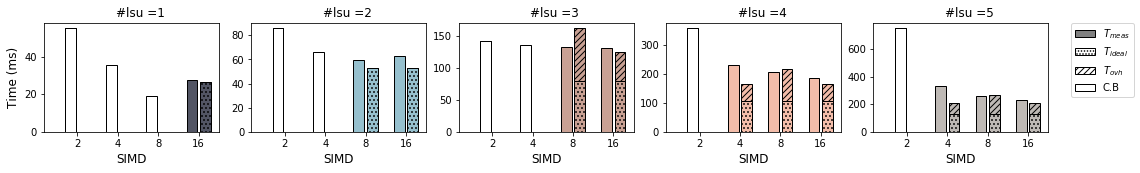

In [330]:
import matplotlib.patches as mpatches
r=1
c=5
width = ("2", "4", "8", "16")
colorcycle = ['#525564','#96c0ce','#c9a194','#f3bdaa','#beb9b5','#dfBA87']
fig1, ax1 = plt.subplots(r,c, figsize=(18,2))
# i=0
plt.subplots_adjust(hspace=0.45,wspace=0.185)

for i in range (0,5):   
    plt.subplot(r,c,i+1)
    y_pos=range(2,16*2,3)
    for j in range (0,4): 
        if (j==0):
            plt.bar (y_pos[j],
             np.divide(mn1.loc[[i*4+j], "Time (ms)"] , 1),
             alpha=1, color=colorcycle[i],linewidth=1,edgecolor='black'
                     #,hatch = '|||'
            )
            plt.title(group[i],x=0.55,y=1,loc='center')
        if (bin[i*4+j]==1):
            plt.bar (y_pos[j],
             np.divide(mn1.loc[[i*4+j], "Time (ms)"] , 1),
             alpha=1, color=colorcycle[i],linewidth=1,edgecolor='black'
                     #,hatch = '|||'
                    )
        else:
            plt.bar (y_pos[j],
             np.divide(mn1.loc[[i*4+j], "Time (ms)"] , 1),
             alpha=1, color='white',linewidth=1,edgecolor='black')
        
    y_pos=np.add(y_pos,1)
    bot_Tideal=[T_ideal[i*4],T_ideal[i*4+1],T_ideal[i*4+2],T_ideal[i*4+3]]
    top_Tovh=[T_ovh[i*4],T_ovh[i*4+1],T_ovh[i*4+2],T_ovh[i*4+3]]
    plt.bar ([y_pos[0],y_pos[1],y_pos[2],y_pos[3]],
             bot_Tideal,
             alpha=1, color=colorcycle[i],  hatch = '...',edgecolor='black'
            )
    plt.bar ([y_pos[0],y_pos[1],y_pos[2],y_pos[3]],
             top_Tovh,
             bottom=bot_Tideal,
             alpha=1, color=colorcycle[i],  hatch = '////',edgecolor='black'
            )
    plt.xlabel("SIMD",fontsize=fs)
    if (i==0):
        plt.ylabel("Time (ms)",fontsize=fs)

    y_pos=range(2,16*2,3)
    y_pos=np.add(y_pos,0.5)
    plt.xticks(y_pos, width)   

    plt.xlim([0,13])
a_val=1
circ1 = mpatches.Patch( facecolor='w',alpha=a_val,hatch=r'////',label=r'$T_{ovh}$',edgecolor='black')
circ2= mpatches.Patch( facecolor='w',alpha=a_val,hatch='....',label=r'$T_{ideal}$',edgecolor='black')
circ3 = mpatches.Patch(facecolor='grey',label=r'$T_{meas}$',edgecolor='black')
#circ3 = mpatches.Patch(facecolor='w',alpha=a_val,hatch='|||',label=r'$T_{meas}$',edgecolor='black')
circ4 = mpatches.Patch(facecolor='w',alpha=a_val,hatch='',label=r'C.B',edgecolor='black')
plt.legend(handles = [circ3,circ2,circ1,circ4],loc=2,bbox_to_anchor=(1.1, 1.05))


plt.savefig('Mem_model_Nocoalesced_1866_bar_ovh2.pdf', bbox_inches="tight")

error= (np.abs(Est_time-TIME)/TIME)*100

[0.997896   1.96723775 4.68000588 2.8345847  1.10488641]


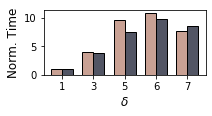

In [352]:
# testing the stride access
# for pair number the access generated are coalesced aligned
#this test is executed with #lsu=3

delta=[1,3, 5, 6, 7]
deltaT_exe=[33.2,130.9,318.1,362.43, 257.77]
ndeltaT_exe=np.divide(deltaT_exe,deltaT_exe[0])
estm=[31.5,124.3, 250.19, 323.93, 283.7]
estm=np.divide(estm,deltaT_exe[0])

x = [1,2,3,4,5]

fig1, ax1 = plt.subplots(1,1, figsize=(2.9,1.2))

plt.bar(np.add(x,-width/2),ndeltaT_exe, width, color=colorcycle[2],edgecolor='black' )
plt.xticks(x, delta) 
plt.bar(np.add(x,width/2),estm,width, color=colorcycle[0],edgecolor='black' )
plt.xlabel(r'$\delta$',fontsize=fs)
plt.ylabel("Norm. Time",fontsize=fs)

plt.savefig('Mem_model_Nocoalesced_1866_delta.pdf', bbox_inches="tight")

aligned_exe=[33.27,66.54, 67.97, 127.86,233.3]
delta=[1, 2, 3, 4, 6]
compare=np.divide(deltaT_exe,aligned_exe)
print(compare)

# Burst Coalesced Write Acknowledge


In [276]:
import pandas as pd
mw1 = pd.read_csv("writeAck_1866.csv",decimal=',')
# mc1["BW (MB/S)"]=pd.to_numeric(mc1["BW (MB/S)"])
mw1

,LOAD/STORE,SIMD,Frecuencia (MHz),BW read,BW write,Avr. Write Burst,Avr. Read Burst,Stall Read (%),Stall Write (%),Time (ms),Type of memory,LD units,width LD,ST Units,Width Units,Latency,BW (MB/S)
0,1,2,475.0,0.0,603.4,1,1,0.00,75.20,151.88,Write-ack,0,32,2,32,NaN,11954.8
1,1,4,450.0,0.0,392.8,1,1,0.00,86.80,153.75,Write-ack,0,32,4,32,NaN,11953.5
2,1,8,443.8,0.0,171.9,1,1,0.00,93.13,152.64,Write-ack,0,32,8,32,NaN,12046.1
3,1,16,458.3,0.0,852.3,1,1,0.00,96.51,152.71,Write-ack,0,32,16,32,NaN,12023.4
4,2,2,405.0,1827.9,1827.9,1,1,92.17,13.83,564.95,Write-ack,2,32,2,32,NaN,7020.7
5,2,4,475.0,1316.4,1316.4,1,1,95.73,9.78,396.10,Write-ack,4,32,4,32,NaN,9892.4
6,2,8,437.5,607.8,607.8,1,1,97.86,8.00,428.81,Write-ack,8,32,8,32,NaN,9162.2
7,2,16,387.5,295.3,295.3,1,1,98.79,5.80,441.09,Write-ack,16,32,16,32,NaN,9008.4
8,3,2,415.0,1553.3,1560.0,1,1,94.19,11.18,664.72,Write-ack,4,32,2,32,NaN,9013.0
9,3,4,412.5,885.2,885.2,1,1,96.76,9.68,588.93,Write-ack,8,32,4,32,NaN,10232.4


In [277]:
LSU=mw1.get("LOAD/STORE")
WD=mw1.get("Width Units")
FRQ=mw1.get("Frecuencia (MHz)")*1e6
SIMD=mw1.get("SIMD")
TIME=mw1.get("Time (ms)")
ST=mw1.get("LD units")
LD=mw1.get("ST Units")

BW=14928e6
Fmem=1866e6
#Fmem=2666e6
dq=8
bl=8
burst_n=5

TRCD=13.5e-9
TRP=TRCD
TWR=15e-9
WI=32768000
ls_bytes=4
delta=16

burst_size=2**(burst_n)*dq*bl

TWR=0
T_exe=np.zeros(len(WD))
T_ovh=np.zeros(len(WD))
T_ideal=LSU/BW *ls_bytes*WI 

for i in range (0,len(WD)):
    #the burst coalesced aligned units
     T_ovh[i]=((LSU[i]-1)/(burst_size))*((TRCD+TRP))*ls_bytes*WI
     T_ovh[i]+=((1)/(burst_size))*((TRCD+TRP+TWR))*ls_bytes*WI
     
     if (LSU[i]<3):
        T_ovh[i]=0
     Tco = 0
     T_exe[i]=(T_ideal[i]+T_ovh[i]) *(delta)

max_burst= WD/8 *(ST+LD) /(64)
bin=(max_burst>=1)    
bin= np.multiply(bin,1)

Est_time = (T_exe)*1000 *bin
T_ideal=T_ideal*1000 *bin*(delta)
T_ovh=T_ovh*1000 *bin*(delta)

error= (np.abs(Est_time-TIME)/TIME)*100
print (error*bin)

0      0.000000
1      0.000000
2      0.000000
3      8.005724
4      0.000000
5      0.000000
6     34.477060
7     36.301227
8      0.000000
9      0.000000
10    21.359935
11    18.092045
12     0.000000
13    12.658463
14    19.424696
15    10.328160
16     0.000000
17    13.740183
18    16.766110
19     5.477716
20     0.000000
21    17.311906
22    13.778226
23     2.058762
dtype: float64


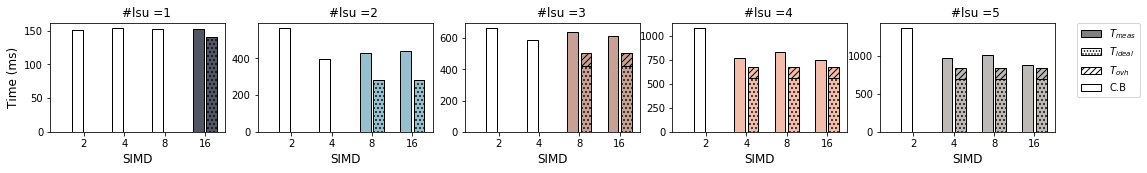

In [286]:
import matplotlib.patches as mpatches
r=1
c=5
width = ("2", "4", "8", "16")
colorcycle = ['#525564','#96c0ce','#c9a194','#f3bdaa','#beb9b5','#dfBA87']
fig1, ax1 = plt.subplots(r,c, figsize=(18,2))
# i=0
plt.subplots_adjust(hspace=0.45,wspace=0.185)

for i in range (0,5):   
    plt.subplot(r,c,i+1)
    y_pos=range(2,16*2,3)
    for j in range (0,4): 
        if (j==0):
            plt.bar (y_pos[j],
             np.divide(mw1.loc[[i*4+j], "Time (ms)"] , 1),
             alpha=1, color=colorcycle[i],linewidth=1,edgecolor='black'
                     #,hatch = '|||'
            )
            plt.title(group[i],x=0.55,y=1,loc='center')
        if (bin[i*4+j]==1):
            plt.bar (y_pos[j],
             np.divide(mw1.loc[[i*4+j], "Time (ms)"] , 1),
             alpha=1, color=colorcycle[i],linewidth=1,edgecolor='black'
                     #,hatch = '|||'
                    )
        else:
            plt.bar (y_pos[j],
             np.divide(mw1.loc[[i*4+j], "Time (ms)"] , 1),
             alpha=1, color='white',linewidth=1,edgecolor='black')
        
    y_pos=np.add(y_pos,1)
    bot_Tideal=[T_ideal[i*4],T_ideal[i*4+1],T_ideal[i*4+2],T_ideal[i*4+3]]
    top_Tovh=[T_ovh[i*4],T_ovh[i*4+1],T_ovh[i*4+2],T_ovh[i*4+3]]
    plt.bar ([y_pos[0],y_pos[1],y_pos[2],y_pos[3]],
             bot_Tideal,
             alpha=1, color=colorcycle[i],  hatch = '...',edgecolor='black'
            )
    plt.bar ([y_pos[0],y_pos[1],y_pos[2],y_pos[3]],
             top_Tovh,
             bottom=bot_Tideal,
             alpha=1, color=colorcycle[i],  hatch = '////',edgecolor='black'
            )
    plt.xlabel("SIMD",fontsize=fs)
    if (i==0):
        plt.ylabel("Time (ms)",fontsize=fs)

    y_pos=range(2,16*2,3)
    y_pos=np.add(y_pos,0.5)
    plt.xticks(y_pos, width)   

    plt.xlim([0,13])
a_val=1
circ1 = mpatches.Patch( facecolor='w',alpha=a_val,hatch=r'////',label=r'$T_{ovh}$',edgecolor='black')
circ2= mpatches.Patch( facecolor='w',alpha=a_val,hatch='....',label=r'$T_{ideal}$',edgecolor='black')
circ3 = mpatches.Patch(facecolor='grey',label=r'$T_{meas}$',edgecolor='black')
#circ3 = mpatches.Patch(facecolor='w',alpha=a_val,hatch='|||',label=r'$T_{meas}$',edgecolor='black')
circ4 = mpatches.Patch(facecolor='w',alpha=a_val,hatch='',label=r'C.B',edgecolor='black')
plt.legend(handles = [circ3,circ2,circ1,circ4],loc=2,bbox_to_anchor=(1.1, 1.05))

plt.savefig('Mem_model_WriteAck_1866_bar_ovh2.pdf', bbox_inches="tight")

error= (np.abs(Est_time-TIME)/TIME)*100

# Atomic-Pipeline LSU

In [294]:
import pandas as pd
ma1 = pd.read_csv("atomic_1866.csv",decimal=',')
# mc1["BW (MB/S)"]=pd.to_numeric(mc1["BW (MB/S)"])
ma1

,LOAD/STORE,SIMD,Frequency (MHz),BW read,ATOMIC OPERATIONS,Avr. Write Burst,Avr. Read Burst,Stall Read (%),Stall Write (%),Time (ms),Type of memory,LD units,Width LD,ST Units,Width Units,Latency,BW (MB/s)
0,1,2,458.3,0.0,1,0,0,0.00,0,5113.700,atomic,0,0,1,32,185,0
1,1,4,458.3,0.0,1,0,0,0.00,0,2557.162,atomic,0,0,1,32,185,0
2,1,8,458.3,0.0,1,0,0,0.00,0,1278.800,atomic,0,0,1,32,185,0
3,1,16,458.3,0.0,1,0,0,0.00,0,639.260,atomic,0,0,1,32,185,0
4,2,2,370.0,37.0,1,0,0,58.21,0,10653.300,atomic,1,64,2,32,0,0
5,2,4,387.5,34.4,1,0,0,96.04,0,10542.600,atomic,1,128,4,32,0,0
6,2,8,391.7,21.7,1,0,0,81.08,0,10307.800,atomic,1,256,8,32,0,0
7,2,16,362.5,12.7,1,0,0,57.37,0,10360.800,atomic,1,512,16,32,0,0
8,3,2,375.0,21.6,2,0,0,89.68,0,21258.400,atomic,2,64,4,32,240,0
9,3,4,370.0,15.4,2,0,0,56.89,0,21324.950,atomic,2,128,8,32,240,0


In [295]:
LSU=ma1.get("LOAD/STORE")
WD=ma1.get("Width LD")
FRQ=ma1.get("Frequency (MHz)")*1e6
SIMD=ma1.get("SIMD")
TIME=np.divide(ma1.get("Time (ms)"),1000)
ST=ma1.get("LD units")
LD=ma1.get("ST Units")
Atom=ma1.get("ATOMIC OPERATIONS")
BW=14928e6
Fmem=1866e6
#Fmem=2666e6
dq=8
bl=8
burst_n=5

TRCD=13.5e-9
TRP=TRCD
TWR=15e-9

WI=32768000
ls_bytes=4
delta=1

burst_sizeAt=1
burst_sizeC=WD/32+1
TWR=0

T_exe=np.zeros(len(WD))
T_ovh=np.zeros(len(WD))
T_ideal=LSU/BW *ls_bytes*WI 

for i in range (0,len(WD)):
    #the burst coalesced aligned units
     T_ovh[i]=((LD[i])/(burst_sizeC[i]))*((TRCD+TRP))*ls_bytes*WI
     T_ovh[i]+=((Atom[i])/(burst_sizeAt))*((2*TRCD+2*TRP+TWR)+Tcoor)*ls_bytes*WI
     if (LSU[i]==1):
        T_ovh[i]=T_ovh[i]/SIMD[i]

     T_exe[i]=(T_ideal[i]+T_ovh[i]) *(delta)

max_burst= np.ones(len(WD))
bin=(max_burst>=1)    
bin= np.multiply(bin,1)

Est_time = (T_exe)*bin
T_ideal=T_ideal *bin*(delta)
T_ovh=T_ovh*bin*(delta)
error= (np.abs(Est_time-TIME)/TIME)*100
print ("Estimation error:",error)

Estimation error: 0     13.591260
1     13.749081
2     14.072903
3     14.784638
4      2.022992
5      3.481530
6      8.890516
7     10.119483
8      1.842148
9      2.276944
10     0.929896
11     8.841705
12     2.457701
13     0.443304
14     7.280894
15     5.944490
16     3.791193
17     0.818170
18     4.417566
19     2.504793
20     0.925511
21     1.319811
22     4.187029
23     2.451481
Name: Time (ms), dtype: float64


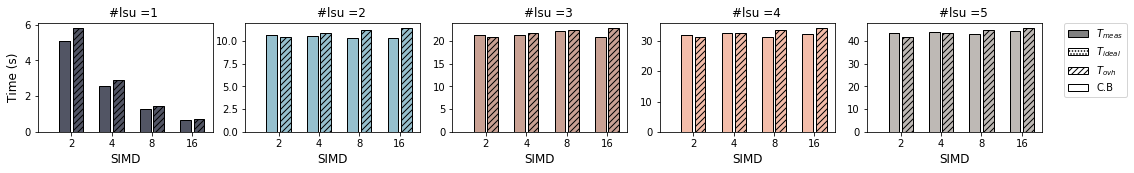

In [297]:
import matplotlib.patches as mpatches
r=1
c=5
width = ("2", "4", "8", "16")
colorcycle = ['#525564','#96c0ce','#c9a194','#f3bdaa','#beb9b5','#dfBA87']
fig1, ax1 = plt.subplots(r,c, figsize=(18,2))
# i=0
plt.subplots_adjust(hspace=0.45,wspace=0.185)

for i in range (0,5):   
    plt.subplot(r,c,i+1)
    y_pos=range(2,16*2,3)
    for j in range (0,4): 
        if (j==0):
            plt.bar (y_pos[j],
             np.divide(ma1.loc[[i*4+j], "Time (ms)"] , 1000),
             alpha=1, color=colorcycle[i],linewidth=1,edgecolor='black'
                     #,hatch = '|||'
            )
            plt.title(group[i],x=0.55,y=1,loc='center')
        if (bin[i*4+j]==1):
            plt.bar (y_pos[j],
             np.divide(ma1.loc[[i*4+j], "Time (ms)"] , 1000),
             alpha=1, color=colorcycle[i],linewidth=1,edgecolor='black'
                    # ,hatch = '|||'
                    )
        else:
            plt.bar (y_pos[j],
             np.divide(ma1.loc[[i*4+j], "Time (ms)"] , 1000),
             alpha=1, color='white',linewidth=1,edgecolor='black')
        
    y_pos=np.add(y_pos,1)
    bot_Tideal=[T_ideal[i*4],T_ideal[i*4+1],T_ideal[i*4+2],T_ideal[i*4+3]]
    top_Tovh=[T_ovh[i*4],T_ovh[i*4+1],T_ovh[i*4+2],T_ovh[i*4+3]]
    plt.bar ([y_pos[0],y_pos[1],y_pos[2],y_pos[3]],
             bot_Tideal,
             alpha=1, color=colorcycle[i],  hatch = '...',edgecolor='black'
            )
    plt.bar ([y_pos[0],y_pos[1],y_pos[2],y_pos[3]],
             top_Tovh,
             bottom=bot_Tideal,
             alpha=1, color=colorcycle[i],  hatch = '////',edgecolor='black'
            )
    plt.xlabel("SIMD",fontsize=fs)
    if (i==0):
        plt.ylabel("Time (s)",fontsize=fs)

    y_pos=range(2,16*2,3)
    y_pos=np.add(y_pos,0.5)
    plt.xticks(y_pos, width)   

    plt.xlim([0,13])
a_val=1
circ1 = mpatches.Patch( facecolor='w',alpha=a_val,hatch=r'////',label=r'$T_{ovh}$',edgecolor='black')
circ2= mpatches.Patch( facecolor='w',alpha=a_val,hatch='....',label=r'$T_{ideal}$',edgecolor='black')
circ3 = mpatches.Patch(facecolor='grey',label=r'$T_{meas}$',edgecolor='black')
#circ3 = mpatches.Patch(facecolor='w',alpha=a_val,hatch='|||',label=r'$T_{meas}$',edgecolor='black')
circ4 = mpatches.Patch(facecolor='w',alpha=a_val,hatch='',label=r'C.B',edgecolor='black')
plt.legend(handles = [circ3,circ2,circ1,circ4],loc=2,bbox_to_anchor=(1.1, 1.05))

plt.savefig('Mem_model_Atomic_1866_bar_ovh2.pdf', bbox_inches="tight")

error= (np.abs(Est_time-TIME)/TIME)*100